|Họ và Tên|MSSV|Lớp TH|
|:-|:-:|:-:|
|Nguyễn Nhật Hoàng|20520516|.2|

#### Resources

In [32]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt

...

Ellipsis

#### Bài 1: Xây dựng mô hình 1-layer MLP và hàm Softmax làm activation function. Huấn luyện mô hình này sử dụng SGD làm optimizer và đánh giá trên các độ đo accuracy, precision, recall và F1-macro. Đánh giá kết quả của mô hình với từng chữ số.


In [26]:
# Tải dữ liệu MNIST từ thư viện Keras
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Chuẩn hóa dữ liệu (chuyển các giá trị pixel từ 0-255 về 0-1)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Chuyển đổi nhãn thành dạng one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Reshape dữ liệu từ (28, 28) thành (784,) cho MLP
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))


In [27]:
# Xây dựng mô hình MLP
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(28 * 28,)))

# Compile mô hình với optimizer SGD và loss là categorical crossentropy
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


C:\Users\PhongVu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6162 - loss: 1.4274 - val_accuracy: 0.8604 - val_loss: 0.6110
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8585 - loss: 0.5926 - val_accuracy: 0.8827 - val_loss: 0.4802
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8765 - loss: 0.4883 - val_accuracy: 0.8910 - val_loss: 0.4282
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8834 - loss: 0.4427 - val_accuracy: 0.8963 - val_loss: 0.3994
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8886 - loss: 0.4119 - val_accuracy: 0.9005 - val_loss: 0.3795
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8928 - loss: 0.3938 - val_accuracy: 0.9033 - val_loss: 0.3664
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8971 - loss: 0.3782 - val_accuracy: 0.9059 - val_loss: 0.3550
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8965 - loss: 0.3726 - val_accuracy: 0.

In [28]:
# Dự đoán trên tập test
y1_pred = model.predict(test_images)
y1_pred_classes = np.argmax(y1_pred, axis=1)
y1_true_classes = np.argmax(test_labels, axis=1)

# Đánh giá các độ đo
precision1, recall1, f11, _ = precision_recall_fscore_support(y1_true_classes, y1_pred_classes, average=None)
accuracy1 = accuracy_score(y1_true_classes, y1_pred_classes)

# In kết quả
print(f'Accuracy: {accuracy1:.4f}')
for i in range(10):  # In ra các
    print(f'Class {i}: Precision: {precision1[i]:.4f}, Recall: {recall1[i]:.4f}, F1-score: {f11[i]:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9100
Class 0: Precision: 0.9415, Recall: 0.9847, F1-score: 0.9626
Class 1: Precision: 0.9550, Recall: 0.9718, F1-score: 0.9633
Class 2: Precision: 0.9256, Recall: 0.8682, F1-score: 0.8960
Class 3: Precision: 0.9077, Recall: 0.8960, F1-score: 0.9018
Class 4: Precision: 0.8954, Recall: 0.9236, F1-score: 0.9093
Class 5: Precision: 0.8865, Recall: 0.8498, F1-score: 0.8678
Class 6: Precision: 0.9270, Recall: 0.9405, F1-score: 0.9337
Class 7: Precision: 0.9119, Recall: 0.9056, F1-score: 0.9087
Class 8: Precision: 0.8563, Recall: 0.8686, F1-score: 0.8624
Class 9: Precision: 0.8827, Recall: 0.8801, F1-score: 0.8814


#### Bài 2: Xây dựng mô hình 3-layer MLP, hàm ReLU và hàm softmax làm activation function. Trong đó activation function cho 2 layer đầu là ReLU và activation function cho layer cuối là Softmax. Huấn luyện mô hình này sử dụng SGD làm optimizer và đánh giá trên các độ đo accuracy, precision, recall và F1-macro. Đánh giá kết quả của mô hình với từng chữ số.


In [29]:
# Xây dựng mô hình MLP 3-layer
model3 = Sequential()

# Layer 1: Dense với 128 neurons, activation là ReLU
model3.add(Dense(128, activation='relu', input_shape=(28 * 28,)))

# Layer 2: Dense với 64 neurons, activation là ReLU
model3.add(Dense(64, activation='relu'))

# Layer 3: Dense với 10 đầu ra, activation là Softmax (phân loại thành 10 lớp)
model3.add(Dense(10, activation='softmax'))

# Compile mô hình với optimizer SGD và loss là categorical crossentropy
model3.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\PhongVu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Huấn luyện mô hình
model3.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6116 - loss: 1.3897 - val_accuracy: 0.8895 - val_loss: 0.3979
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8935 - loss: 0.3848 - val_accuracy: 0.9098 - val_loss: 0.3175
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9090 - loss: 0.3157 - val_accuracy: 0.9203 - val_loss: 0.2755
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9219 - loss: 0.2741 - val_accuracy: 0.9288 - val_loss: 0.2507
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9285 - loss: 0.2504 - val_accuracy: 0.9341 - val_loss: 0.2356
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9328 - loss: 0.2339 - val_accuracy: 0.9371 - val_loss: 0.2199
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9364 - loss: 0.2201 - val_accuracy: 0.9404 - val_loss: 0.2043
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9427 - loss: 0.2046 - val_accuracy: 0.

In [31]:
# Dự đoán
y3_pred = model3.predict(test_images)
y3_pred_classes = np.argmax(y3_pred, axis=1)
y3_true_classes = np.argmax(test_labels, axis=1)

# Tính accuracy
accuracy3 = accuracy_score(y3_true_classes, y3_pred_classes)

# Tính precision, recall, F1 cho từng lớp (chữ số từ 0 đến 9)
precision3, recall3, f13, _ = precision_recall_fscore_support(y3_true_classes, y3_pred_classes, average=None)

# In kết quả
print(f'Accuracy: {accuracy3:.4f}')
for i in range(10):  # Với từng chữ số từ 0 đến 9
    print(f'Class {i}: Precision: {precision3[i]:.4f}, Recall: {recall3[i]:.4f}, F1-score: {f13[i]:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.9474
Class 0: Precision: 0.9677, Recall: 0.9786, F1-score: 0.9731
Class 1: Precision: 0.9806, Recall: 0.9780, F1-score: 0.9793
Class 2: Precision: 0.9406, Recall: 0.9506, F1-score: 0.9455
Class 3: Precision: 0.9408, Recall: 0.9436, F1-score: 0.9422
Class 4: Precision: 0.9155, Recall: 0.9603, F1-score: 0.9374
Class 5: Precision: 0.9465, Recall: 0.9327, F1-score: 0.9396
Class 6: Precision: 0.9400, Recall: 0.9656, F1-score: 0.9526
Class 7: Precision: 0.9607, Recall: 0.9280, F1-score: 0.9441
Class 8: Precision: 0.9320, Recall: 0.9281, F1-score: 0.9300
Class 9: Precision: 0.9461, Recall: 0.9049, F1-score: 0.9250


#### Một số trực quan hóa

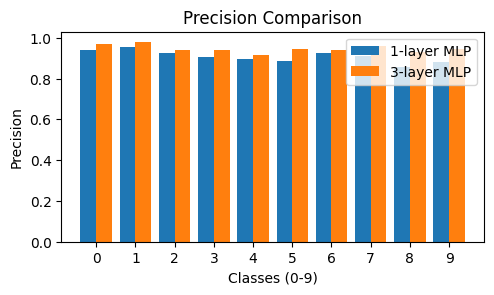

In [36]:
# Vẽ biểu đồ
labels = range(10)
x = np.arange(len(labels))

plt.figure(figsize=(12, 6))

# Biểu đồ cho Precision
plt.subplot(2, 2, 2)
plt.bar(x - 0.2, precision1, width=0.4, label='1-layer MLP')
plt.bar(x + 0.2, precision3, width=0.4, label='3-layer MLP')
plt.xticks(x, labels)
plt.title('Precision Comparison')
plt.xlabel('Classes (0-9)')
plt.ylabel('Precision')
plt.legend()

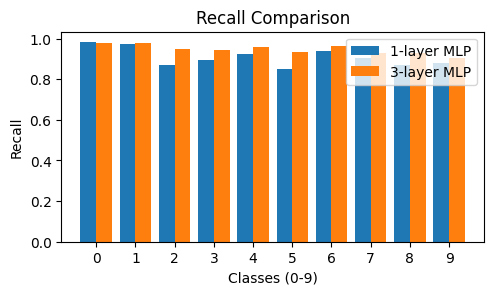

In [38]:
# Biểu đồ cho Recall
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 3)
plt.bar(x - 0.2, recall1, width=0.4, label='1-layer MLP')
plt.bar(x + 0.2, recall3, width=0.4, label='3-layer MLP')
plt.xticks(x, labels)
plt.title('Recall Comparison')
plt.xlabel('Classes (0-9)')
plt.ylabel('Recall')
plt.legend()

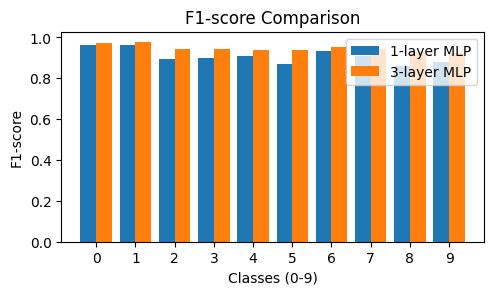

In [40]:
# Biểu đồ cho F1-score
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 4)
plt.bar(x - 0.2, f11, width=0.4, label='1-layer MLP')
plt.bar(x + 0.2, f13, width=0.4, label='3-layer MLP')
plt.xticks(x, labels)
plt.title('F1-score Comparison')
plt.xlabel('Classes (0-9)')
plt.ylabel('F1-score')
plt.legend()